# Multiple Linear Regression
## Prediction of Car Price

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
<br>
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car

## Step 1: Data Understanding

Importing NumPy and Pandas libraries to read the cars dataset

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
df_car = pd.read_csv('D:/Maria/Linear Regression Assignment/CarPrice_Assignment.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Checking the Datatypes

In [3]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Datatypes are appropriate and no changes are required

### Checking for missing values in the dataset

In [4]:
df_car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values are observed

### Duplicate Values check

In [5]:
df_car.duplicated().value_counts()

False    205
dtype: int64

No duplicate values found

### Checking the dataset shape

In [6]:
df_car.shape

(205, 26)

### Statistics check

In [7]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Extracting the Company name from CarName variable

In [8]:
df_car['CarName'] = df_car['CarName'].apply(lambda x : x.split()[0])
df_car.rename(columns={'CarName':'CarCompany'},inplace=True)

### Checking the unique values of the CarCompany variable

In [9]:
df_car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
df_car['CarCompany'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
vw              2
maxda           2
renault         2
vokswagen       1
toyouta         1
porcshce        1
mercury         1
Nissan          1
Name: CarCompany, dtype: int64

### Name corrections - CarCompany

In [11]:
df_car.replace({'CarCompany' : {'Nissan':'nissan',
                               'porcshce':'porsche',
                               'toyouta':'toyota',
                               'vokswagen':'volkswagen',
                               'vw':'volkswagen',
                               'maxda':'mazda'}}, inplace=True)

In [12]:
df_car['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Name Corrections completed and Verified

### Dropping column car_ID as it is not significantly important for the model

In [13]:
df_car.drop('car_ID',axis=1,inplace=True)

## Step 2: Visualising the Data

We can visualize the variables and understand if there is any
- multicollinearity
- strong association of independent variables with the dependent variable

In [14]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables using pairplot

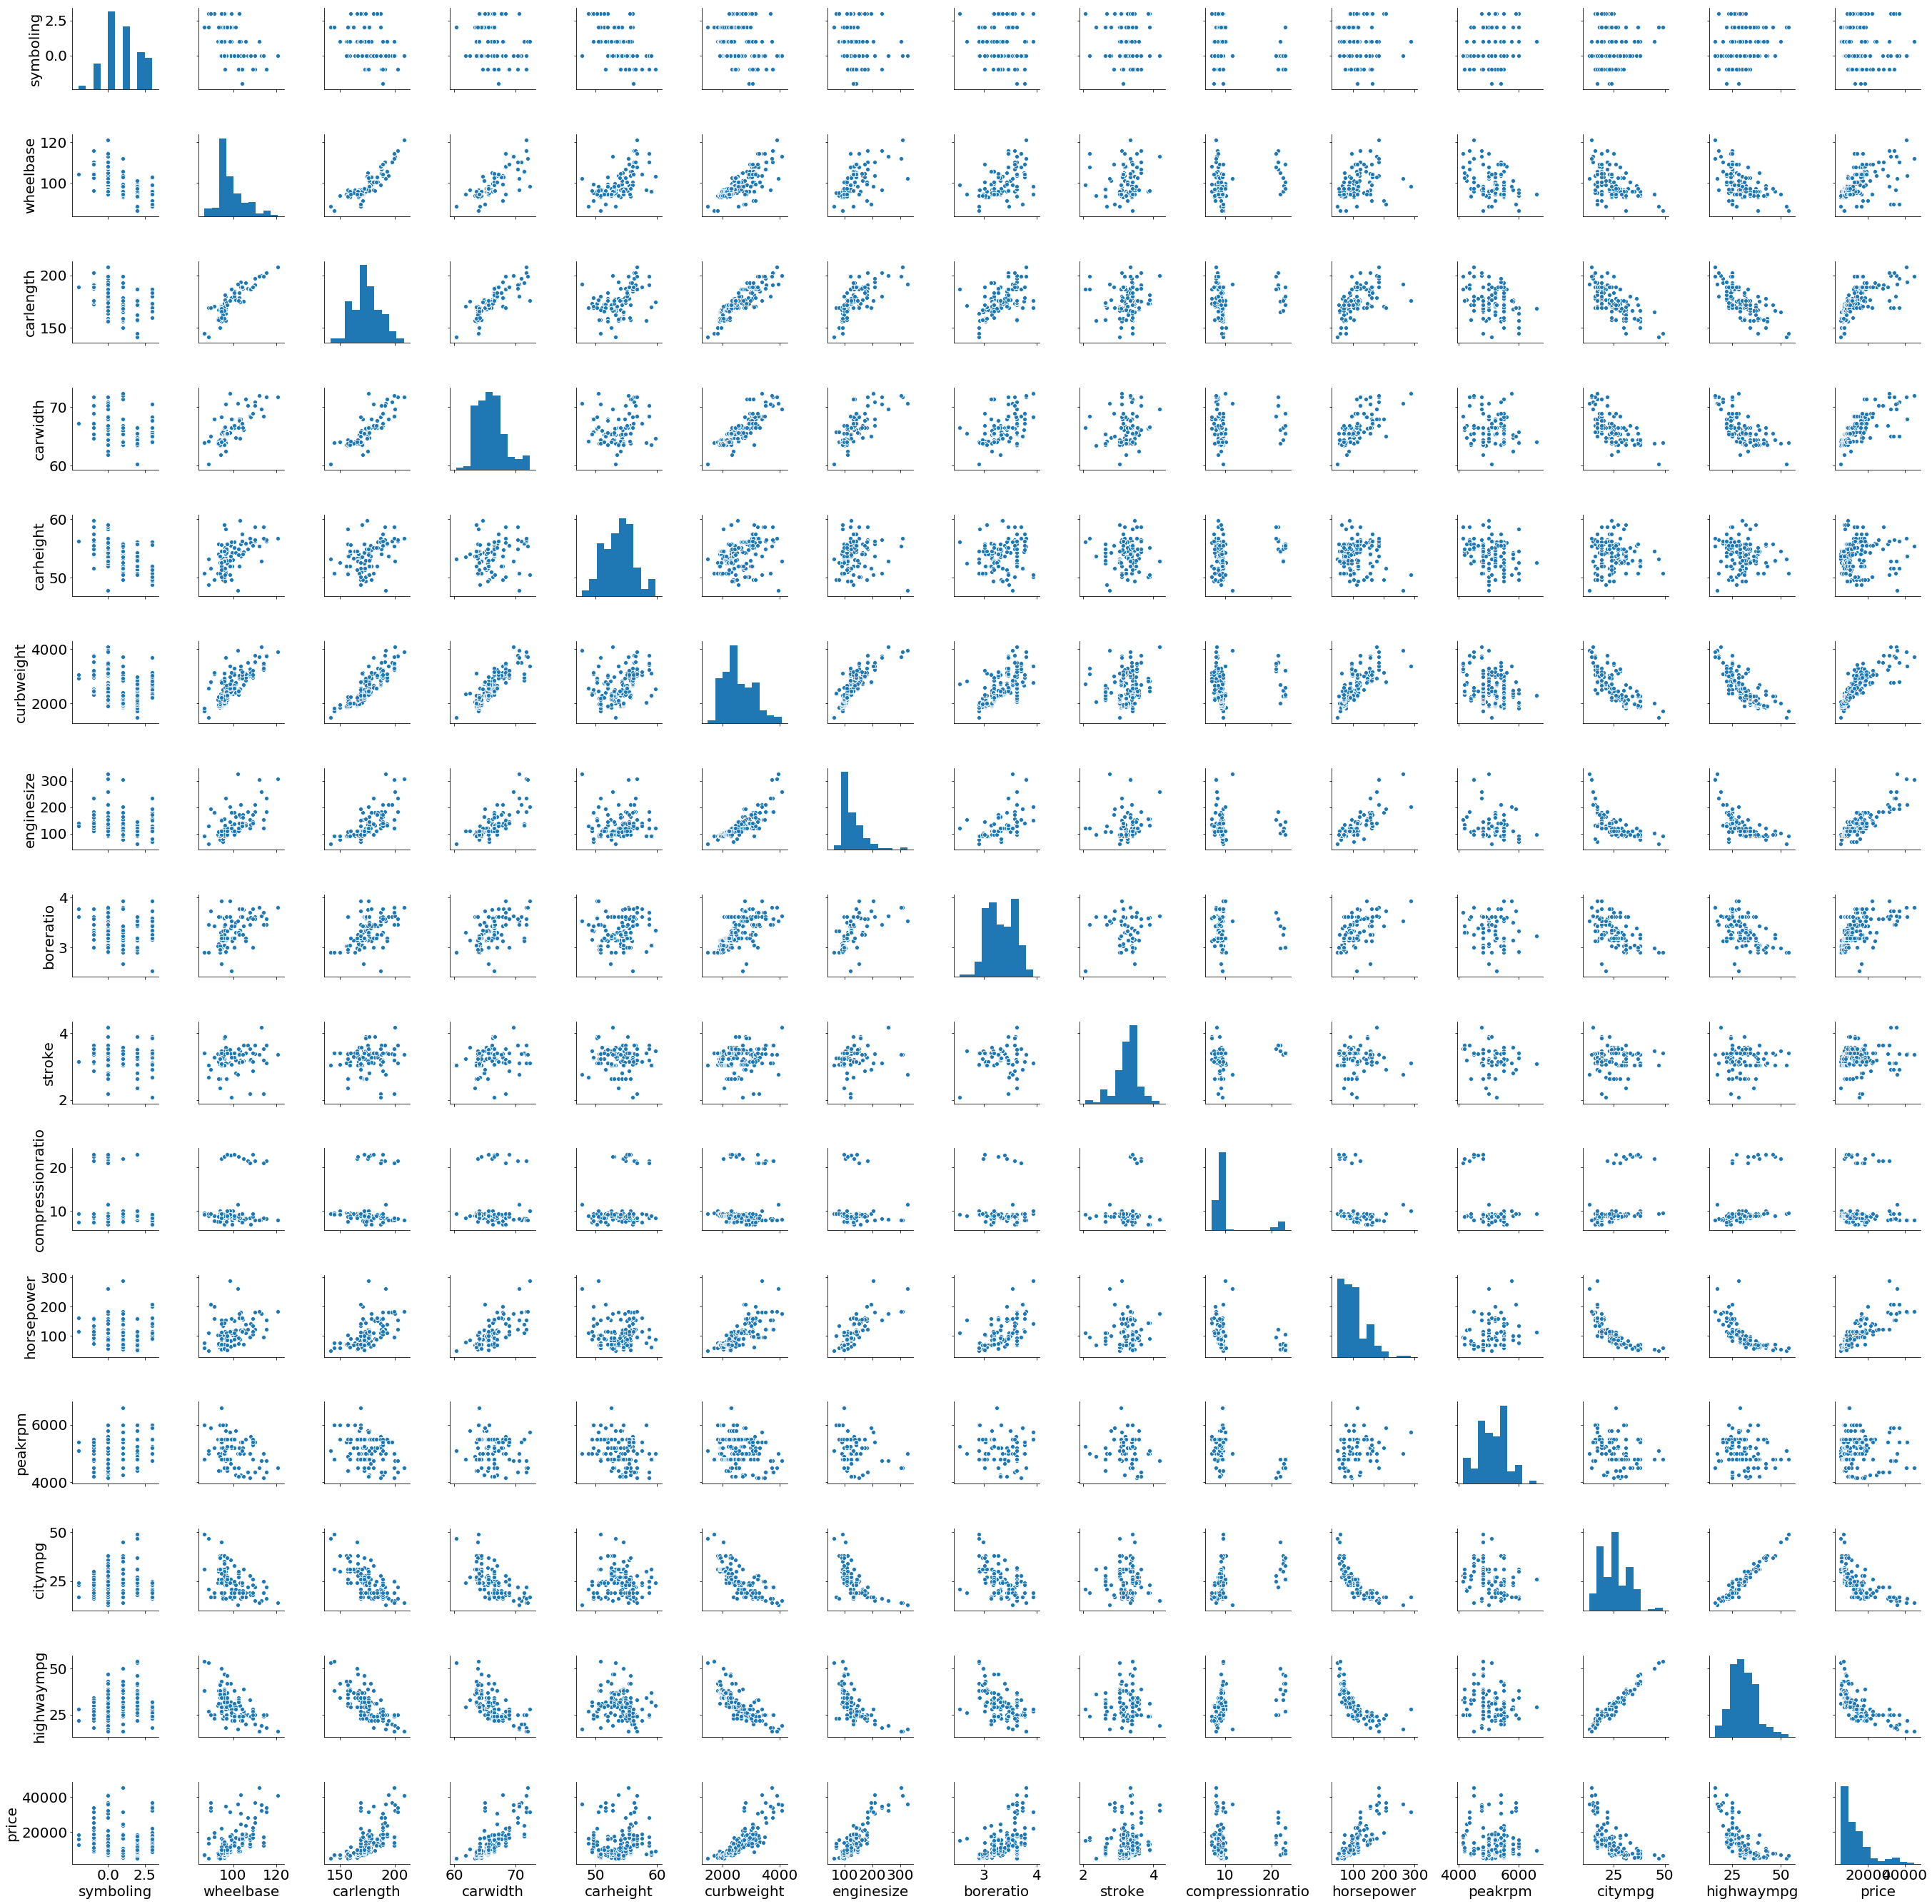

In [15]:
plt.rcParams.update({'font.size': 20})
sns.pairplot(df_car)
plt.show()

We can understand from the pairplot that certain independent variables are linearily related with the target variable (Price)
- wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, stroke, horsepower
- Hence the Linear Regression is applicable to predict the car prices

#### Visualising Categorical Variables using boxplots

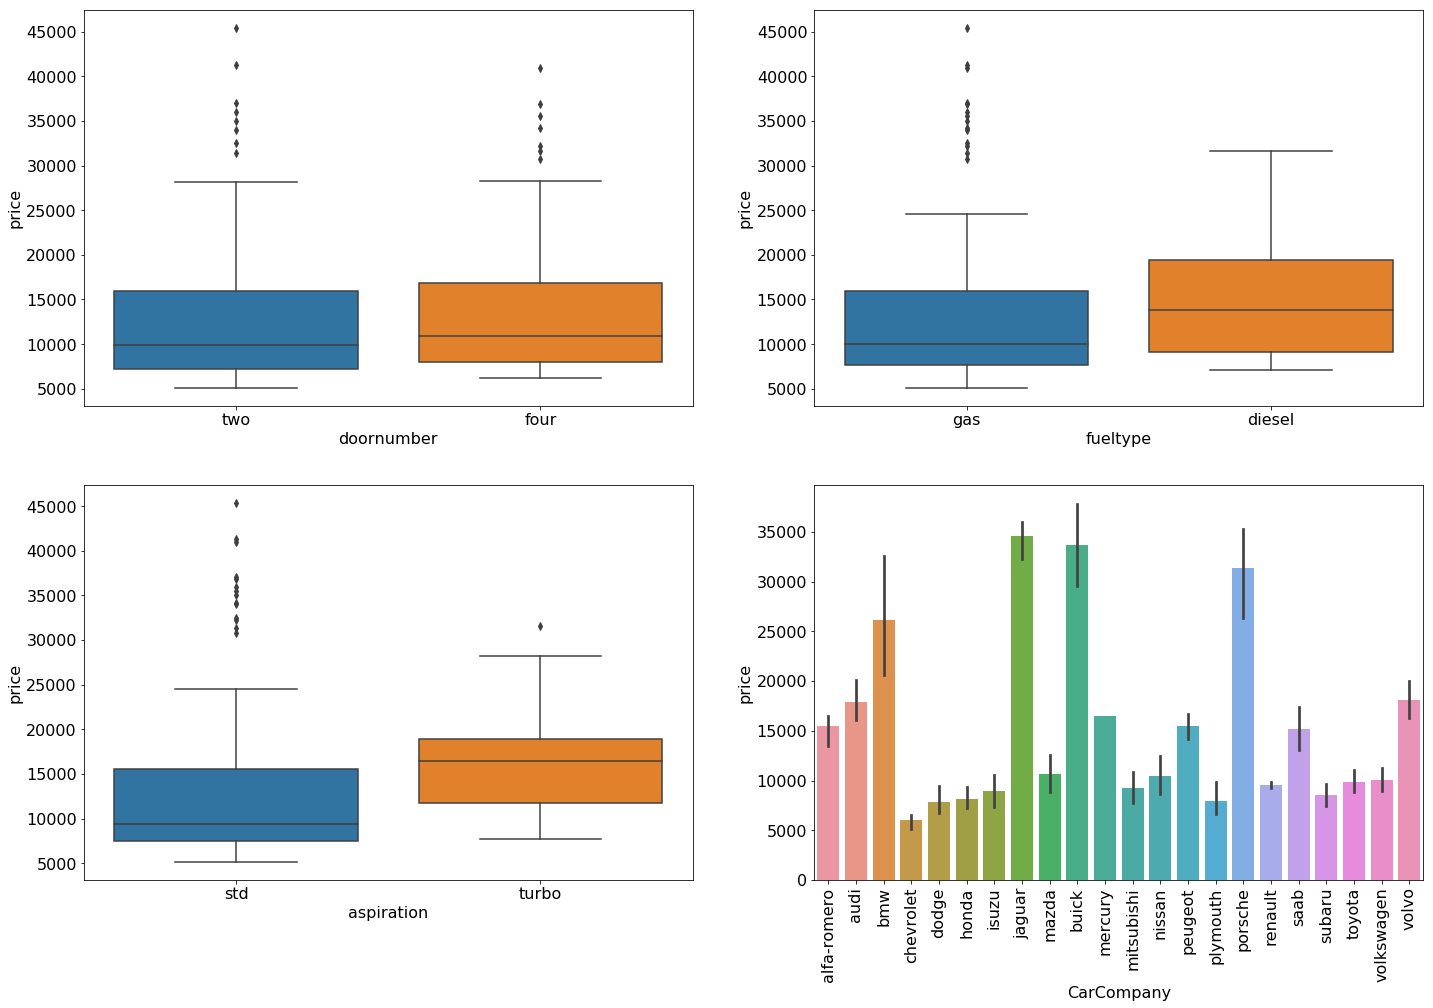

In [16]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(24, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(2,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
plt.subplot(2,2,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(2,2,4)
sns.barplot(x = 'CarCompany', y = 'price', data = df_car)
plt.xticks(rotation=90)
plt.show()

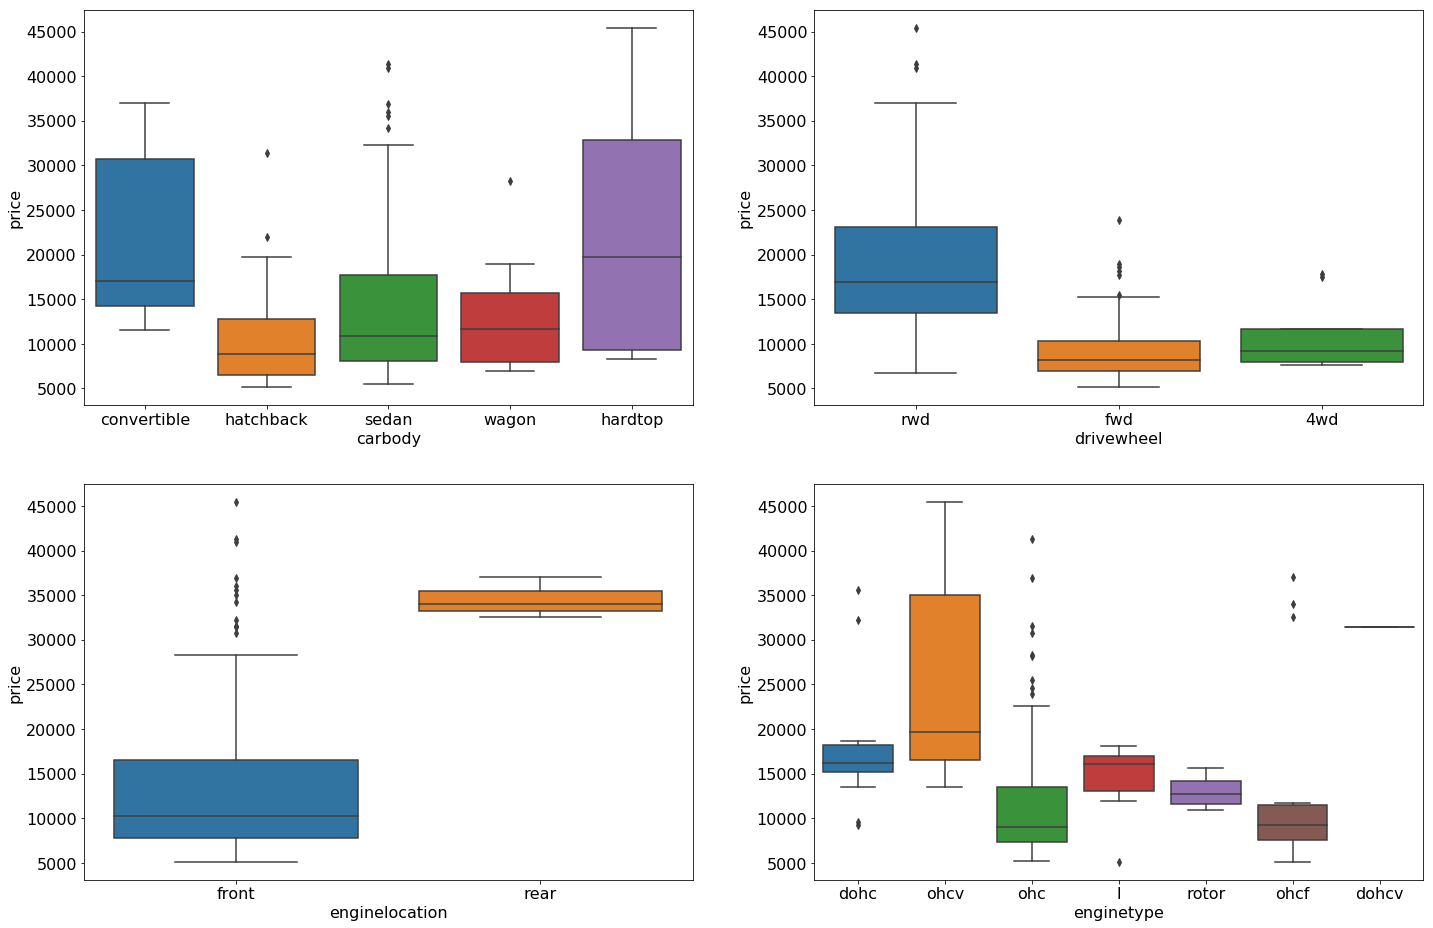

In [17]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(24, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
plt.subplot(2,2,2)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
plt.subplot(2,2,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(2,2,4)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.show()

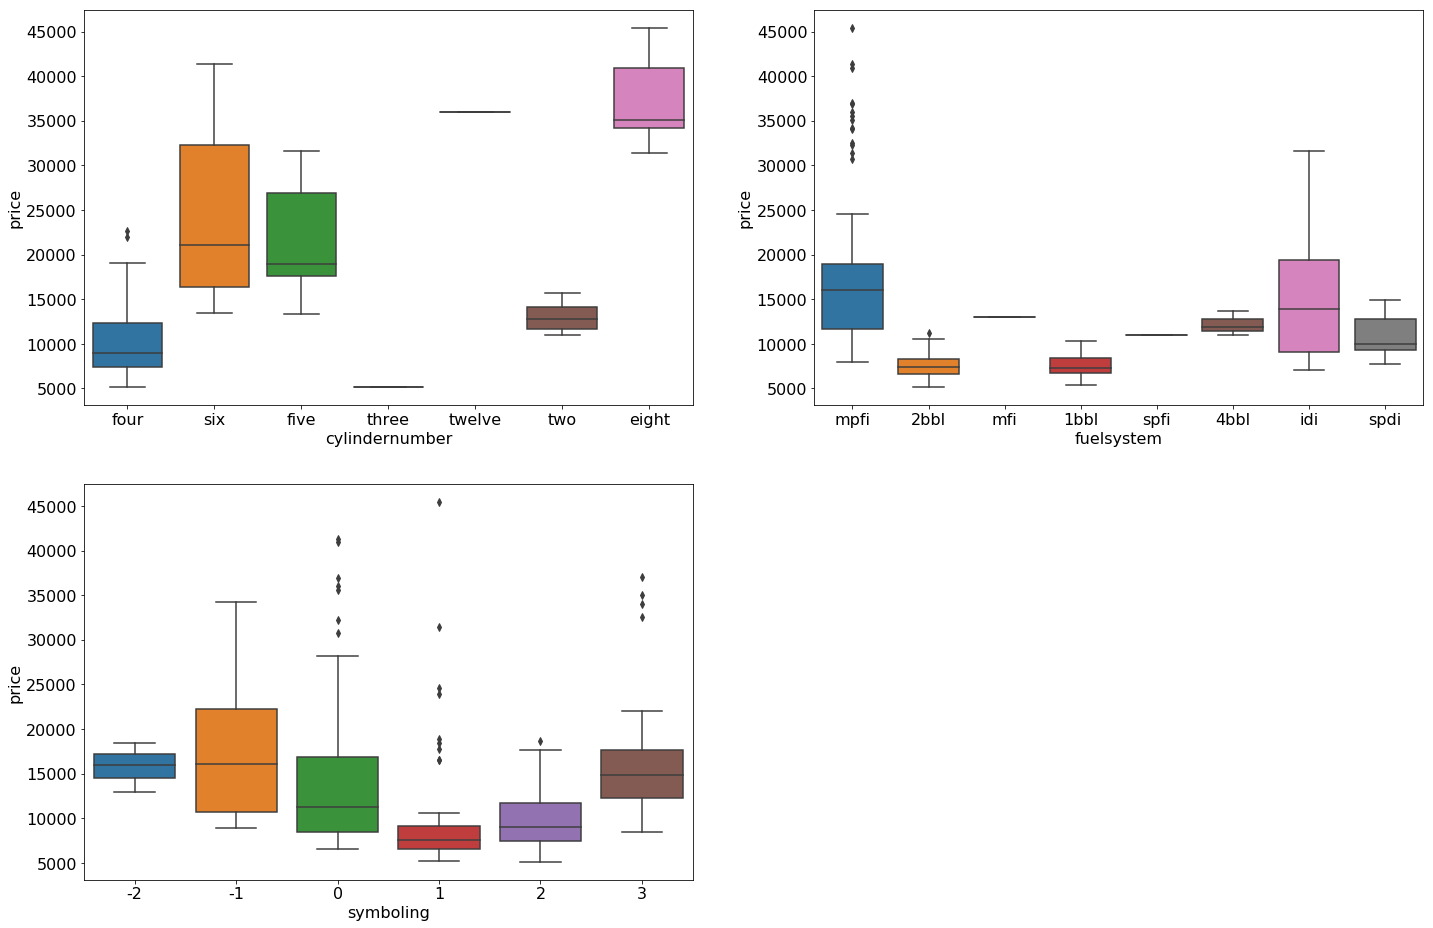

In [18]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(24, 16))
plt.subplot(2,2,1)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
plt.subplot(2,2,2)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
plt.subplot(2,2,3)
sns.boxplot(x = 'symboling', y = 'price', data = df_car)
plt.show()

## Step 3: Data Preparation

- Converting the categorical columns to numeric values inorder to enable the Linear Regression Model Building

In [19]:
df = df_car.copy()

### Converting the categorical variables : doornumber, cylindernumber, aspiration, fueltype and enginelocation

In [20]:
cat_conv = {'doornumber':     {'four': 4, 'two': 2},
            'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'eight': 8,
                                  'two': 2, 'twelve': 12, 'three':3 },
           'aspiration': {'std':0, 'turbo':1},
           'fueltype': {'gas':1, 'diesel': 0},
           'enginelocation': {'front':0, 'rear':1}}
df.replace(cat_conv, inplace=True)

### Converting the Car Companies into numeric codes

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["CarCompany_code"] = le.fit_transform(df["CarCompany"])
brand_codes = df[["CarCompany", "CarCompany_code"]]

#### Encoded Car Company codes

In [22]:
brand_codes.drop_duplicates(inplace=True)
brand_codes.sort_values('CarCompany_code')

,CarCompany,CarCompany_code
0,alfa-romero,0
3,audi,1
10,bmw,2
67,buick,3
18,chevrolet,4
21,dodge,5
30,honda,6
43,isuzu,7
47,jaguar,8
50,mazda,9


Dropping Car Company Name Column

In [23]:
df.drop(['CarCompany'],axis=1,inplace=True)

### Creating Dummies
For Variables : Carbody, drivewheel, fuelsystem, enginetype

In [24]:
dum_cols = ['carbody', 'drivewheel', 'fuelsystem','enginetype']
for col in dum_cols:
    dummies = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,3,1,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
1,3,1,0,2,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,2,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,0,1,0
3,2,1,0,4,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,0,1,0,0,0
4,2,1,0,4,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,0,0,1,0,0,0


### Verifying the datatypes after conversion

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
symboling            205 non-null int64
fueltype             205 non-null int64
aspiration           205 non-null int64
doornumber           205 non-null int64
enginelocation       205 non-null int64
wheelbase            205 non-null float64
carlength            205 non-null float64
carwidth             205 non-null float64
carheight            205 non-null float64
curbweight           205 non-null int64
cylindernumber       205 non-null int64
enginesize           205 non-null int64
boreratio            205 non-null float64
stroke               205 non-null float64
compressionratio     205 non-null float64
horsepower           205 non-null int64
peakrpm              205 non-null int64
citympg              205 non-null int64
highwaympg           205 non-null int64
price                205 non-null float64
CarCompany_code      205 non-null int32
carbody_hardtop      205 non-null uint8

### Step 4: Splitting the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the numeric variables to have a comparable scale
- Scaling Method used - MinMax scaling

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['CarCompany_code','symboling', 'doornumber','wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

### Checking the statistics - All variable values fall between 0 and 1

In [29]:
pd.options.display.max_columns = 999
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany_code,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.181818,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.562438,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.298075,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,0.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.571429,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.857143,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### checking the correlation coefficients to see which variables are highly correlated
- Those variables which seem to have highly correlated are only displayed

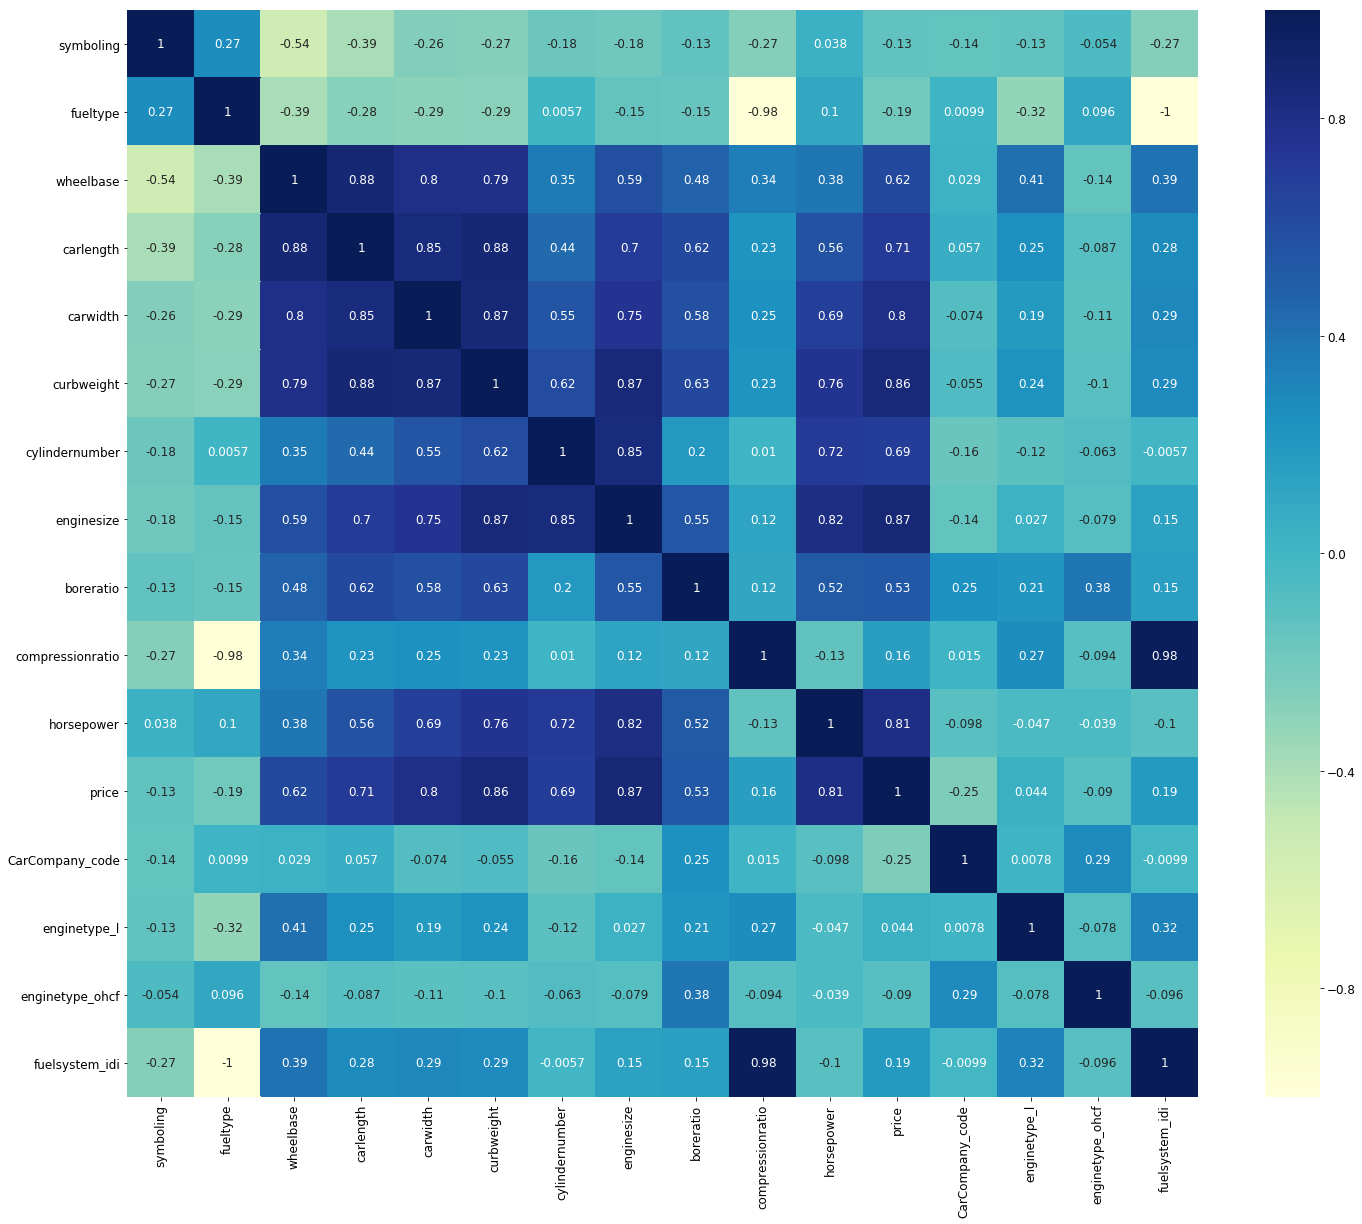

In [30]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (24, 20))
df_corr = df_train[['symboling','fueltype','wheelbase','carlength','carwidth','curbweight',
                   'cylindernumber','enginesize','boreratio','compressionratio','horsepower',
                   'price','CarCompany_code','enginetype_l','enginetype_ohcf','fuelsystem_idi']]
sns.heatmap(df_corr.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Step 5: Building a linear model
 - Here we use both automated and manual approach
 - Initially we select 12 features using automated approach - RECURSIVE FEATURE ELIMINATION
 - And then manually drop the features by checking p-values and Variance Inflation Factor

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

x_list = list(df_train.columns.difference(['price']).values)
X_train = df_train[x_list]
y_train = df_train["price"]

# Linear Regression Model
lr = LinearRegression()

rfe = RFE(lr, n_features_to_select=12)
rfe.fit(X_train,y_train)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train)))


Features sorted by their rank:
[(1, 'boreratio'), (1, 'carbody_wagon'), (1, 'carwidth'), (1, 'curbweight'), (1, 'cylindernumber'), (1, 'enginelocation'), (1, 'enginesize'), (1, 'enginetype_dohcv'), (1, 'enginetype_rotor'), (1, 'highwaympg'), (1, 'horsepower'), (1, 'stroke'), (2, 'carbody_hatchback'), (3, 'wheelbase'), (4, 'carbody_hardtop'), (5, 'carbody_sedan'), (6, 'enginetype_ohc'), (7, 'enginetype_ohcf'), (8, 'CarCompany_code'), (9, 'carheight'), (10, 'drivewheel_rwd'), (11, 'symboling'), (12, 'peakrpm'), (13, 'aspiration'), (14, 'fuelsystem_mpfi'), (15, 'fuelsystem_4bbl'), (16, 'fuelsystem_2bbl'), (17, 'fuelsystem_idi'), (18, 'compressionratio'), (19, 'fueltype'), (20, 'enginetype_ohcv'), (21, 'enginetype_l'), (22, 'carlength'), (23, 'doornumber'), (24, 'fuelsystem_spdi'), (25, 'citympg'), (26, 'drivewheel_fwd'), (27, 'fuelsystem_mfi'), (28, 'fuelsystem_spfi')]


### Selecting all the features of rank 1 to build the models
Here we try to fit a regression line through the training data using `statsmodels`

### MODEL 1


In [32]:
import statsmodels.api as sm

In [33]:
X = X_train[['boreratio', 'carbody_wagon', 'carwidth', 'curbweight', 'cylindernumber', 
             'enginelocation', 'enginesize', 'enginetype_dohcv', 
             'enginetype_rotor', 'highwaympg', 'horsepower', 'stroke']]

X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     73.73
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.07e-52
Time:                        12:37:44   Log-Likelihood:                 163.87
No. Observations:                 143   AIC:                            -301.7
Df Residuals:                     130   BIC:                            -263.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1021      0.111      0.922      0.358      -0.117       0.321
boreratio           -0.3161      0.095     -3.329      0.001      -0.504      -0.128
carbody_wagon       -0.0376      0.023     -1.602      0.112      -0.084       0.009
carwidth             0.3084      0.087      3.548      0.001       0.136       0.480
curbweight           0.2880      0.123      2.347      0.020       0.045       0.531
cylindernumber      -0.7371      0.301     -2.445      0.016      -1.333      -0.141
enginelocation       0.3746      0.090      4.182      0.000       0.197       0.552
enginesize           1.2576      0.311      4.042      0.000       0.642       1.873
enginetype_dohcv     0.1851      0.126      1.470      0.144      -0.064       0.434
enginetype_rotor     0.1022      0.053      1.936      0.055      -0.002       0.207
highwaympg           0.0433      0.078      0.557      0.578      -0.110       0.197
horsepower           0.1304      0.114      1.144      0.255      -0.095       0.356
stroke              -0.2970      0.085     -3.486      0.001      -0.465      -0.128
==============================================================================
Omnibus:                       52.113   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.302
Skew:                           1.251   Prob(JB):                     3.95e-48
Kurtosis:                       8.511   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### BUILDING MODEL #2
- By Dropping the feature 'highwaympg' which has the highest p-value (0.578)

In [34]:
X.drop(['highwaympg'],axis=1,inplace=True)

In [35]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     80.83
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.68e-53
Time:                        12:37:44   Log-Likelihood:                 163.70
No. Observations:                 143   AIC:                            -303.4
Df Residuals:                     131   BIC:                            -267.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1360      0.092  

### Checking VIF

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,57.02
6,enginesize,41.90
2,carwidth,39.35
4,cylindernumber,19.49
9,horsepower,15.39
0,boreratio,9.84
10,stroke,7.48
1,carbody_wagon,1.59
7,enginetype_dohcv,1.50
8,enginetype_rotor,1.49


#### BUILDING MODEL 3
- By Dropping the feature 'horsepower' which has the highest p-value(0.316) and a comparatively high VIF(15.39)

In [38]:
X.drop(['horsepower'],axis=1,inplace=True)

In [39]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     88.80
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.31e-53
Time:                        12:37:45   Log-Likelihood:                 163.15
No. Observations:                 143   AIC:                            -304.3
Df Residuals:                     132   BIC:                            -271.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1266      0.092      1.381      0.170      -0.055       0.308
boreratio           -0.3141      0.093     -3.366      0.001      -0.499      -0.130
carbody_wagon       -0.0416      0.023     -1.795      0.075      -0.087       0.004
carwidth             0.2974      0.086      3.452      0.001       0.127       0.468
curbweight           0.2948      0.112      2.624      0.010       0.073       0.517
cylindernumber      -0.7041      0.294     -2.392      0.018      -1.286      -0.122
enginelocation       0.4043      0.085      4.731      0.000       0.235       0.573
enginesize           1.3106      0.303      4.331      0.000       0.712       1.909
enginetype_dohcv     0.2585      0.104      2.476      0.015       0.052       0.465
enginetype_rotor     0.1159      0.047      2.441      0.016       0.022       0.210
stroke              -0.2946      0.085     -3.472      0.001      -0.462      -0.127
==============================================================================
Omnibus:                       57.172   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.094
Skew:                           1.365   Prob(JB):                     9.03e-57
Kurtosis:                       8.988   Cond. No.                         95.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,54.07
2,carwidth,39.07
6,enginesize,38.68
4,cylindernumber,18.64
0,boreratio,9.84
9,stroke,7.35
1,carbody_wagon,1.56
8,enginetype_rotor,1.28
7,enginetype_dohcv,1.15
5,enginelocation,1.12


#### BUILDING MODEL 4
- By Dropping the feature 'carbody_wagon' which has the highest p-value(0.075) inspite of having a low VIF(1.56)

In [41]:
X.drop(['carbody_wagon'],axis=1,inplace=True)

In [42]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     96.69
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.23e-54
Time:                        12:37:46   Log-Likelihood:                 161.43
No. Observations:                 143   AIC:                            -302.9
Df Residuals:                     133   BIC:                            -273.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1409      0.092      1.531      0.128      -0.041       0.323
boreratio           -0.3372      0.093     -3.618      0.000      -0.522      -0.153
carwidth             0.3369      0.084      4.011      0.000       0.171       0.503
curbweight           0.1995      0.100      1.998      0.048       0.002       0.397
cylindernumber      -0.7960      0.292     -2.723      0.007      -1.374      -0.218
enginelocation       0.4001      0.086      4.644      0.000       0.230       0.570
enginesize           1.4716      0.291      5.050      0.000       0.895       2.048
enginetype_dohcv     0.2703      0.105      2.572      0.011       0.062       0.478
enginetype_rotor     0.1277      0.047      2.694      0.008       0.034       0.222
stroke              -0.3036      0.085     -3.555      0.001      -0.473      -0.135
==============================================================================
Omnibus:                       55.888   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.790
Skew:                           1.348   Prob(JB):                     5.17e-53
Kurtosis:                       8.757   Cond. No.                         92.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,42.19
1,carwidth,36.74
5,enginesize,30.59
3,cylindernumber,17.46
0,boreratio,9.65
8,stroke,7.33
7,enginetype_rotor,1.25
6,enginetype_dohcv,1.15
4,enginelocation,1.12


#### BUILDING MODEL 5
- By Dropping the feature 'curbweight' which has the highest VIF(42.19), inspite of having a lower P-value(0.048)

In [44]:
X.drop(['curbweight'],axis=1,inplace=True)

In [45]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           4.11e-54
Time:                        12:37:46   Log-Likelihood:                 159.31
No. Observations:                 143   AIC:                            -300.6
Df Residuals:                     134   BIC:                            -274.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1914      0.090      2.137      0.034       0.014       0.368
boreratio           -0.3732      0.092     -4.037      0.000      -0.556      -0.190
carwidth             0.4442      0.065      6.802      0.000       0.315       0.573
cylindernumber      -1.0002      0.277     -3.613      0.000      -1.548      -0.453
enginelocation       0.3800      0.087      4.393      0.000       0.209       0.551
enginesize           1.7809      0.250      7.134      0.000       1.287       2.275
enginetype_dohcv     0.2734      0.106      2.574      0.011       0.063       0.484
enginetype_rotor     0.1319      0.048      2.755      0.007       0.037       0.227
stroke              -0.3526      0.083     -4.262      0.000      -0.516      -0.189
==============================================================================
Omnibus:                       51.238   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.555
Skew:                           1.300   Prob(JB):                     6.21e-40
Kurtosis:                       7.852   Cond. No.                         79.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,22.37
4,enginesize,17.18
2,cylindernumber,16.19
0,boreratio,9.46
7,stroke,7.27
6,enginetype_rotor,1.22
5,enginetype_dohcv,1.12
3,enginelocation,1.11


#### BUILDING MODEL 6
- By Dropping the feature 'carwidth' which has the highest VIF(22.37) inspite of having a low p-value (0)

In [47]:
X.drop(['carwidth'],axis=1,inplace=True)

In [48]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     85.70
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.54e-46
Time:                        12:37:47   Log-Likelihood:                 138.11
No. Observations:                 143   AIC:                            -260.2
Df Residuals:                     135   BIC:                            -236.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1955      0.103      1.889      0.061      -0.009       0.400
boreratio           -0.2358      0.104     -2.262      0.025      -0.442      -0.030
cylindernumber      -0.8845      0.319     -2.770      0.006      -1.516      -0.253
enginelocation       0.2424      0.097      2.495      0.014       0.050       0.435
enginesize           2.0053      0.286      7.013      0.000       1.440       2.571
enginetype_dohcv     0.3437      0.122      2.814      0.006       0.102       0.585
enginetype_rotor     0.1977      0.054      3.647      0.000       0.090       0.305
stroke              -0.2607      0.094     -2.765      0.006      -0.447      -0.074
==============================================================================
Omnibus:                       28.887   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.400
Skew:                           0.913   Prob(JB):                     1.54e-12
Kurtosis:                       5.408   Cond. No.                         74.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,cylindernumber,15.66
3,enginesize,15.46
0,boreratio,6.80
6,stroke,5.97
5,enginetype_rotor,1.17
4,enginetype_dohcv,1.10
2,enginelocation,1.05


#### BUILDING MODEL 7
- By Dropping the feature 'cylindernumber' which has the highest VIF(15.66) inspite of having a low p-value(0.006)

In [50]:
X.drop(['cylindernumber'],axis=1,inplace=True)

In [51]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     94.09
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           6.15e-46
Time:                        12:37:48   Log-Likelihood:                 134.15
No. Observations:                 143   AIC:                            -254.3
Df Residuals:                     136   BIC:                            -233.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0710      0.039     -1.819      0.071      -0.148       0.006
boreratio            0.0176      0.051      0.342      0.733      -0.084       0.119
enginelocation       0.2519      0.099      2.533      0.012       0.055       0.449
enginesize           1.2373      0.072     17.269      0.000       1.096       1.379
enginetype_dohcv     0.1399      0.100      1.401      0.164      -0.058       0.337
enginetype_rotor     0.2536      0.052      4.921      0.000       0.152       0.355
stroke              -0.0503      0.057     -0.878      0.381      -0.163       0.063
==============================================================================
Omnibus:                       26.921   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.445
Skew:                           0.751   Prob(JB):                     1.01e-14
Kurtosis:                       5.926   Cond. No.                         16.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,boreratio,6.74
2,enginesize,5.96
5,stroke,4.85
4,enginetype_rotor,1.12
1,enginelocation,1.05
3,enginetype_dohcv,1.05


#### BUILDING MODEL 8
- By Dropping the feature 'boreratio' which has the highest p-value(0.733) and a higher VIF (6.74)

In [53]:
X.drop(['boreratio'],axis=1,inplace=True)

In [54]:
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     113.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.80e-47
Time:                        12:37:48   Log-Likelihood:                 134.09
No. Observations:                 143   AIC:                            -256.2
Df Residuals:                     137   BIC:                            -238.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0623      0.030     -2.101      0.037      -0.121      -0.004
enginelocation       0.2531      0.099      2.554      0.012       0.057       0.449
enginesize           1.2520      0.057     21.918      0.000       1.139       1.365
enginetype_dohcv     0.1440      0.099      1.457      0.147      -0.051       0.339
enginetype_rotor     0.2569      0.050      5.097      0.000       0.157       0.357
stroke              -0.0569      0.054     -1.062      0.290      -0.163       0.049
==============================================================================
Omnibus:                       27.236   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.951
Skew:                           0.744   Prob(JB):                     1.76e-15
Kurtosis:                       6.032   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.90
4,stroke,3.85
3,enginetype_rotor,1.08
0,enginelocation,1.04
2,enginetype_dohcv,1.04


### BUILDING MODEL 9
- By Dropping the feature 'stroke' which has the highest p-value(0.290) inspite of having a low VIF(3.85)

In [56]:
X.drop(['stroke'],axis=1,inplace=True)

In [57]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     141.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.98e-48
Time:                        12:37:49   Log-Likelihood:                 133.50
No. Observations:                 143   AIC:                            -257.0
Df Residuals:                     138   BIC:                            -242.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0891      0.016  

In [58]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.05
2,enginetype_dohcv,1.03
0,enginelocation,1.02
3,enginetype_rotor,1.00


#### BUILDING MODEL 10
- By Dropping the feature 'enginetype_dohcv' which has the highest p-value(0.123) inspite of having a low VIF(1.03)

In [59]:
X.drop(['enginetype_dohcv'],axis=1,inplace=True)

In [60]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     186.1
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.76e-48
Time:                        12:37:50   Log-Likelihood:                 132.27
No. Observations:                 143   AIC:                            -256.5
Df Residuals:                     139   BIC:                            -244.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0914      0.016  

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,1.02
1,enginesize,1.02
2,enginetype_rotor,1.00


### We observe that the p-values and VIF values are in acceptable range. Hence the predictions will be made based on this model - MODEL 10


## Step 7: Residual Analysis of the train data

histogram of the error terms to check if they are normally distributed

Text(0.5, 0, 'Errors')

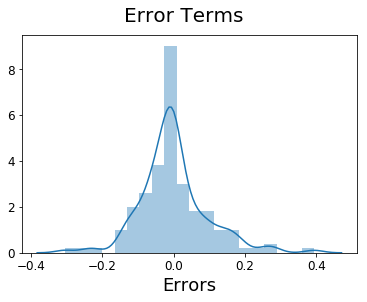

In [62]:
y_train_price = lr_10.predict(X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

### Step 8: Making Predictions Using the Final Model

Apply the scaling transformations on test data and check if the values are within the range

In [63]:
num_vars = ['CarCompany_code','symboling', 'doornumber','wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [64]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany_code,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.887097,0.177419,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.623656,0.080645,0.338710,0.451613,0.096774,0.564516,0.419355,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.300392,0.274512,0.477134,0.501716,0.298064,0.499868,0.497482,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,1.000000,0.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,0.600000,1.000000,0.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.642857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.800000,1.000000,0.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.904762,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0


#### Dividing test data into X_test and y_test

In [65]:
y_test = df_test.pop('price')
X_test = df_test

In [66]:
X_test_lm = pd.DataFrame()

In [67]:
incl_list = list(X_train_lm.columns.values)
drop_list = list(X_test.columns.difference(incl_list).values)
print(incl_list)
print(drop_list)

['const', 'enginelocation', 'enginesize', 'enginetype_rotor']
['CarCompany_code', 'aspiration', 'boreratio', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber', 'doornumber', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling', 'wheelbase']


In [68]:
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm.drop(drop_list, axis = 1)

### Making predictions on test data using the final model

In [69]:
y_pred_lm = lr_10.predict(X_test_lm)

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

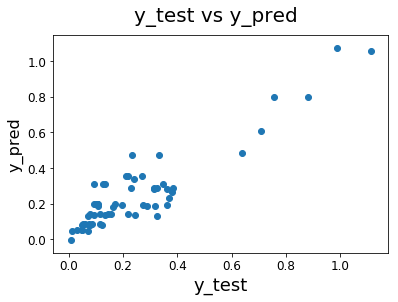

In [70]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

### R-SQUARED OF TEST DATA

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_lm)
r_squared

0.834902484674948

### R-SQUARED OF TRAIN DATA

In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r_squared = r2_score(y_train, y_train_price)
r_squared

0.8006868121254056

### ADJUSTED R-SQUARED OF TRAIN DATA : `0.796`
### R-SQUARED OF TRAIN DATA : `0.8007`
### R-SQUARED OF TEST DATA : `0.8349`

### MEAN SQUARED ERROR OF TEST DATA : `0.09394`

### MSE OF TEST DATA

In [73]:
np.sqrt(mean_squared_error(y_test, y_pred_lm))

0.09393705753566443

## EQUATION OF THE BEST FIT LINE IS:
<b>  car price = `-0.0914` + `1.2501`  times  `enginesize` + `0.2627` times `enginelocation` + `0.2554`  times  `enginetyperotor` </b>

### PREDICTIONS
The Car Price in the American Market can be predicted based on the following factors <br>
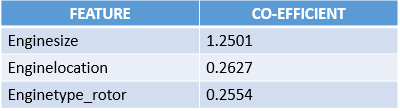

### EVALUATION METRICS:
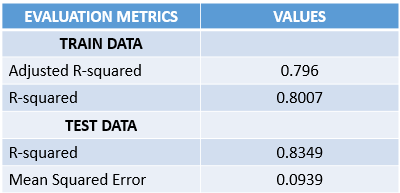